In [27]:
import numpy as np
import pandas as pd
import pandas_datareader as web
import math
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt
from datetime import datetime, timedelta
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
plt.style.use('fivethirtyeight')

import warnings

warnings.filterwarnings('ignore')

In [28]:
end_time = datetime.now()
start_time = end_time - timedelta(days = 59)

df = yf.download("^NSEI",start = start_time,end = end_time,interval="5m")

[*********************100%***********************]  1 of 1 completed


In [29]:
df

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-06-06 09:15:00+05:30,18600.800781,18604.849609,18583.849609,18599.650391,18599.650391,0
2023-06-06 09:20:00+05:30,18598.849609,18601.699219,18589.050781,18591.550781,18591.550781,0
2023-06-06 09:25:00+05:30,18592.050781,18603.400391,18584.150391,18603.250000,18603.250000,0
2023-06-06 09:30:00+05:30,18602.800781,18606.550781,18598.750000,18602.900391,18602.900391,0
2023-06-06 09:35:00+05:30,18602.650391,18617.750000,18600.599609,18611.750000,18611.750000,0
...,...,...,...,...,...,...
2023-08-03 15:05:00+05:30,19359.250000,19369.599609,19347.250000,19369.599609,19369.599609,0
2023-08-03 15:10:00+05:30,19369.050781,19390.099609,19369.050781,19390.099609,19390.099609,0
2023-08-03 15:15:00+05:30,19389.550781,19406.250000,19389.050781,19406.250000,19406.250000,0


In [30]:
df.shape

(3150, 6)

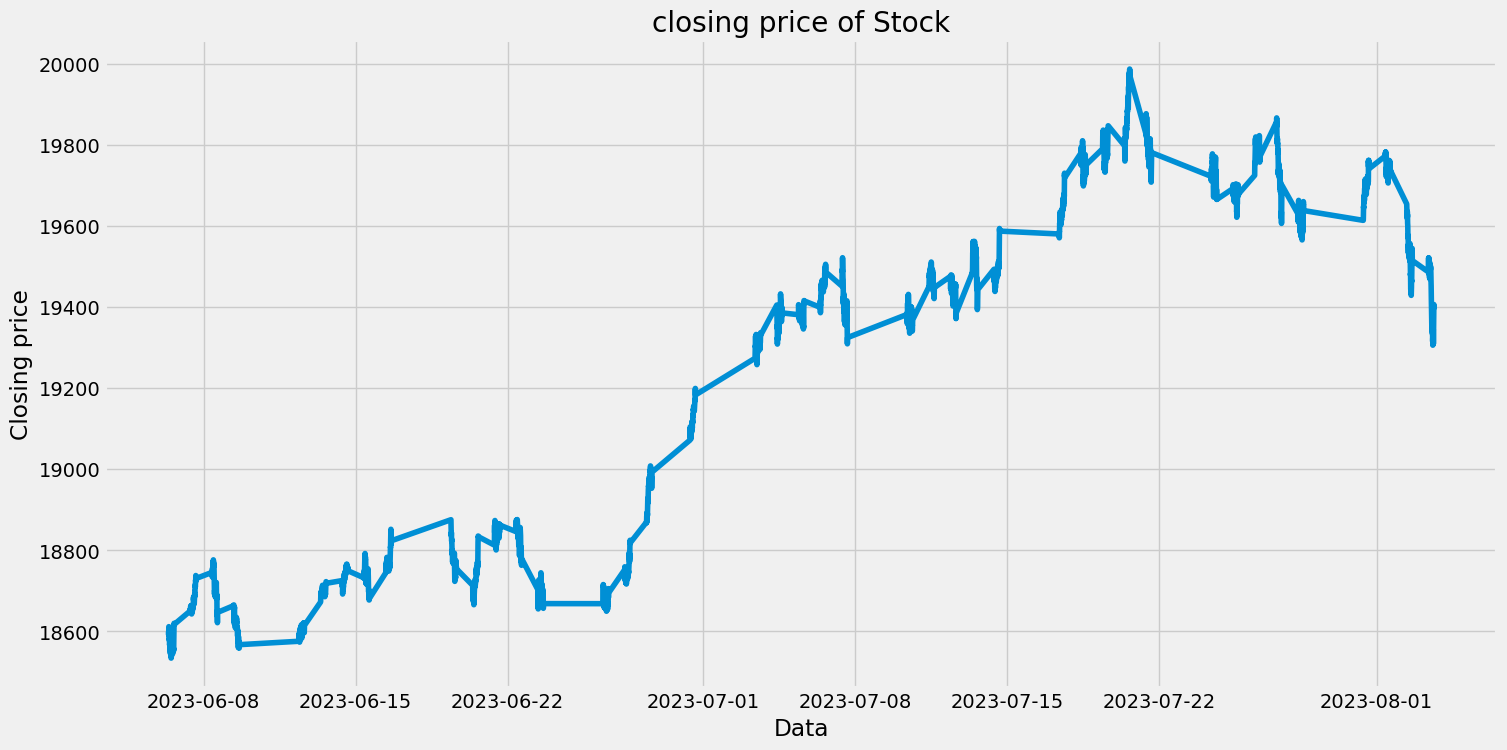

In [31]:
#visualize the closing prices
plt.figure(figsize=(16,8))
plt.title('closing price of Stock')
plt.plot(df["Close"])
plt.xlabel('Data')
plt.ylabel('Closing price')
plt.show()

In [32]:
#create new database with only required coloumns
data=df.filter(['Close'])
#convert the dataframe to numpy array
dataset=data.values
#get the number of rows to train 80 percent
training_data_len=math.ceil(len(dataset)*0.8)
training_data_len

2520

In [33]:
#scale the data
scaler=StandardScaler() 
scaled_data=scaler.fit_transform(dataset)
print("MEAN of processed data: ",scaled_data.mean())
print("Standard deviation of processed data: ",scaled_data.std())

MEAN of processed data:  2.8872847675331055e-15
Standard deviation of processed data:  1.0


In [34]:
#create the training data
#create scaled training dataset
train_data = scaled_data[0:training_data_len, :]
#split the data to x_train and y_train
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i])
  y_train.append(train_data[i])

In [35]:
#convert x_train and y_train into numpy arrays
x_train,y_train=np.array(x_train),np.array(y_train)
x_train.shape

(2460, 60, 1)

In [36]:
#reshape the data
print("x_train shape before reshaping",x_train.shape)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1)) #np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
print("x_train shape after reshaping",x_train.shape)

x_train shape before reshaping (2460, 60, 1)
x_train shape after reshaping (2460, 60, 1)


In [38]:
#build LSTM model
model= Sequential()
model.add(LSTM(200,return_sequences=True,input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.3))
model.add(LSTM(200,return_sequences=False))
model.add(Dropout(0.4))
model.add(Dense(100))
model.add(Dropout(0.5))
model.add(Dense(50))
model.add(Dense(1)) 

In [39]:
#compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [40]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 60, 200)           161600    
                                                                 
 dropout_2 (Dropout)         (None, 60, 200)           0         
                                                                 
 lstm_6 (LSTM)               (None, 200)               320800    
                                                                 
 dropout_3 (Dropout)         (None, 200)               0         
                                                                 
 dense_3 (Dense)             (None, 100)               20100     
                                                                 
 dropout_4 (Dropout)         (None, 100)               0         
                                                                 
 dense_4 (Dense)             (None, 50)               

In [42]:
#train the model
history = model.fit(x_train,y_train,epochs=20)

Epoch 1/20
77/77 [==============================] - 7s 90ms/step - loss: 0.0226
Epoch 2/20
77/77 [==============================] - 7s 96ms/step - loss: 0.0198
Epoch 3/20
77/77 [==============================] - 8s 103ms/step - loss: 0.0205
Epoch 4/20
77/77 [==============================] - 8s 99ms/step - loss: 0.0207
Epoch 5/20
77/77 [==============================] - 8s 102ms/step - loss: 0.0205
Epoch 6/20
77/77 [==============================] - 8s 108ms/step - loss: 0.0251
Epoch 7/20
77/77 [==============================] - 7s 88ms/step - loss: 0.0199
Epoch 8/20
77/77 [==============================] - 7s 88ms/step - loss: 0.0212
Epoch 9/20
77/77 [==============================] - 8s 108ms/step - loss: 0.0210
Epoch 10/20
77/77 [==============================] - 7s 90ms/step - loss: 0.0220
Epoch 11/20
77/77 [==============================] - 7s 89ms/step - loss: 0.0206
Epoch 12/20
77/77 [==============================] - 8s 103ms/step - loss: 0.0196
Epoch 13/20
77/77 [=============

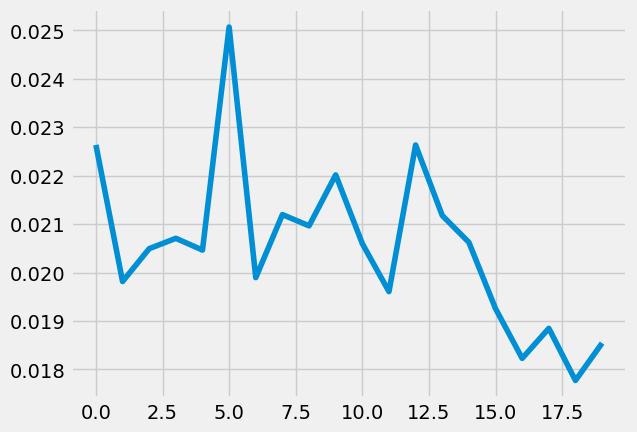

In [43]:
plt.plot(history.history['loss'])

In [44]:
#create the testing dataset
#createt new array
test_data=scaled_data[training_data_len-60:, :]
#create the dataset x_test and y_test
x_test=[]
y_test=dataset[training_data_len: , :]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [45]:
#convert the data to numpy 
x_test=np.array(x_test)

In [46]:
#reshape the data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [47]:
#get the model predicted value
predictions =model.predict(x_test)
predictions=scaler.inverse_transform(predictions)
print(predictions)

20/20 [==============================] - 1s 26ms/step
[[19747.098]
 [19751.664]
 [19752.467]
 [19755.562]
 [19757.158]
 [19758.303]
 [19756.152]
 [19752.826]
 [19748.566]
 [19748.643]
 [19749.338]
 [19752.598]
 [19755.611]
 [19760.686]
 [19754.598]
 [19751.553]
 [19740.635]
 [19731.604]
 [19723.457]
 [19720.988]
 [19722.303]
 [19726.744]
 [19725.871]
 [19723.107]
 [19715.74 ]
 [19702.193]
 [19694.959]
 [19685.367]
 [19676.58 ]
 [19671.512]
 [19668.064]
 [19674.463]
 [19680.193]
 [19680.607]
 [19687.643]
 [19687.98 ]
 [19688.584]
 [19684.453]
 [19680.285]
 [19678.23 ]
 [19677.857]
 [19680.828]
 [19680.936]
 [19677.53 ]
 [19674.234]
 [19669.508]
 [19668.096]
 [19669.418]
 [19672.676]
 [19676.98 ]
 [19679.104]
 [19677.516]
 [19672.771]
 [19670.004]
 [19670.525]
 [19670.137]
 [19669.822]
 [19670.066]
 [19667.787]
 [19667.76 ]
 [19665.443]
 [19662.84 ]
 [19662.566]
 [19663.602]
 [19664.9  ]
 [19666.312]
 [19670.262]
 [19676.102]
 [19681.031]
 [19682.516]
 [19689.166]
 [19695.873]
 [19695.26

In [ ]:
plt.plot(predictions)

In [49]:
df.tail()['Close']

Datetime
2023-08-03 15:05:00+05:30    19369.599609
2023-08-03 15:10:00+05:30    19390.099609
2023-08-03 15:15:00+05:30    19406.250000
2023-08-03 15:20:00+05:30    19400.349609
2023-08-03 15:25:00+05:30    19394.449219
Name: Close, dtype: float64

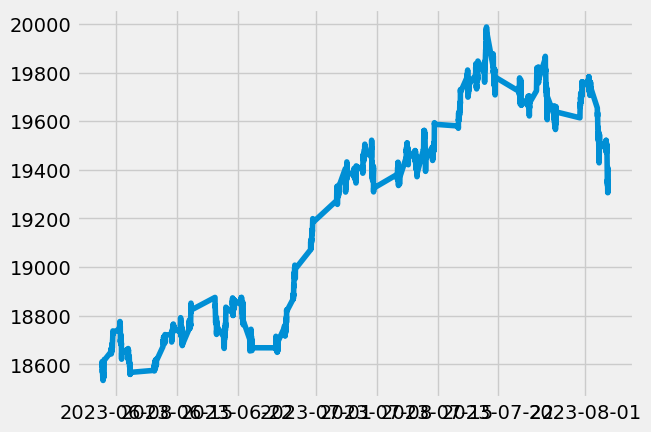

In [52]:
plt.plot(df['Close'])
